# Plotting for Exploratory data analysis (EDA)

# Basic Terminology

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

haberman = pd.read_csv("haberman.csv")

#haberman.head()
haberman.tail()

age  year  nodes  status
301   75    62      1       1
302   76    67      0       1
303   77    65      3       1
304   78    65      1       2
305   83    58      2       2

In [0]:
print (haberman.shape)

(306, 4)


# Observation:
Dataset contains 306 rows and 4 columns

In [0]:
print (haberman.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [0]:
haberman["status"].value_counts()

1    225
2     81
Name: status, dtype: int64

# Observation:
Haberman data set is an imbalanced dataset because the number of datapoints in each status is different.

# 2-D Scatter Plot

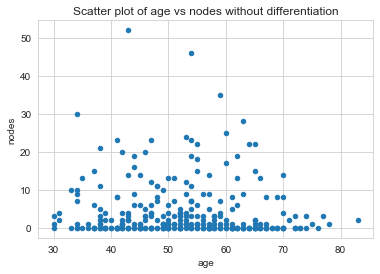

In [0]:
haberman.plot(kind='scatter', x='age', y='nodes') ;
plt.title("Scatter plot of age vs nodes without differentiation")
plt.show()

# Observation:
cannot make much sense out of it even with a different combination of columns

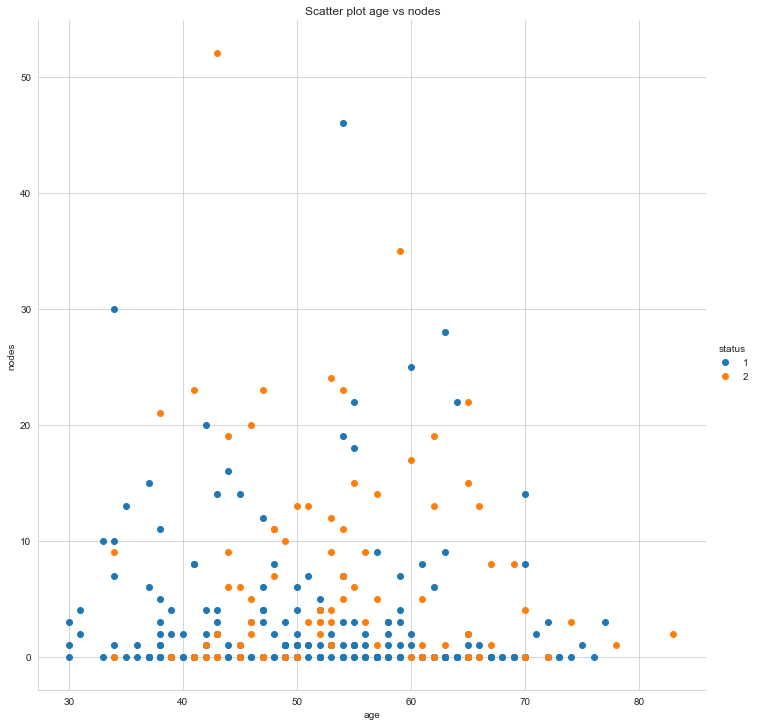

In [0]:
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="status", height = 10) \
   .map(plt.scatter, "age", "nodes") \
   .add_legend();
plt.title("Scatter plot age vs nodes")
plt.show();

# Observation
1. Even though it is an imbalanced dataset, the most number of blue points can be seen below 10 of the y-axis(nodes). So from this, we can tell patients has a better chance of surviving more than 5 years when the number of positive axillary nodes is less than 10 (for being more precise we can tell less than 7)

2. There are very fewer patients with more than 20 axillary nodes.

3. All the patients are in the age range of 30 to 80.

4. We can also see many patients who survived more than 5 years have 0 nodes. But it does not mean that patients will survive more than 5 years if they have 0 axillary nodes.

# Pair-plot

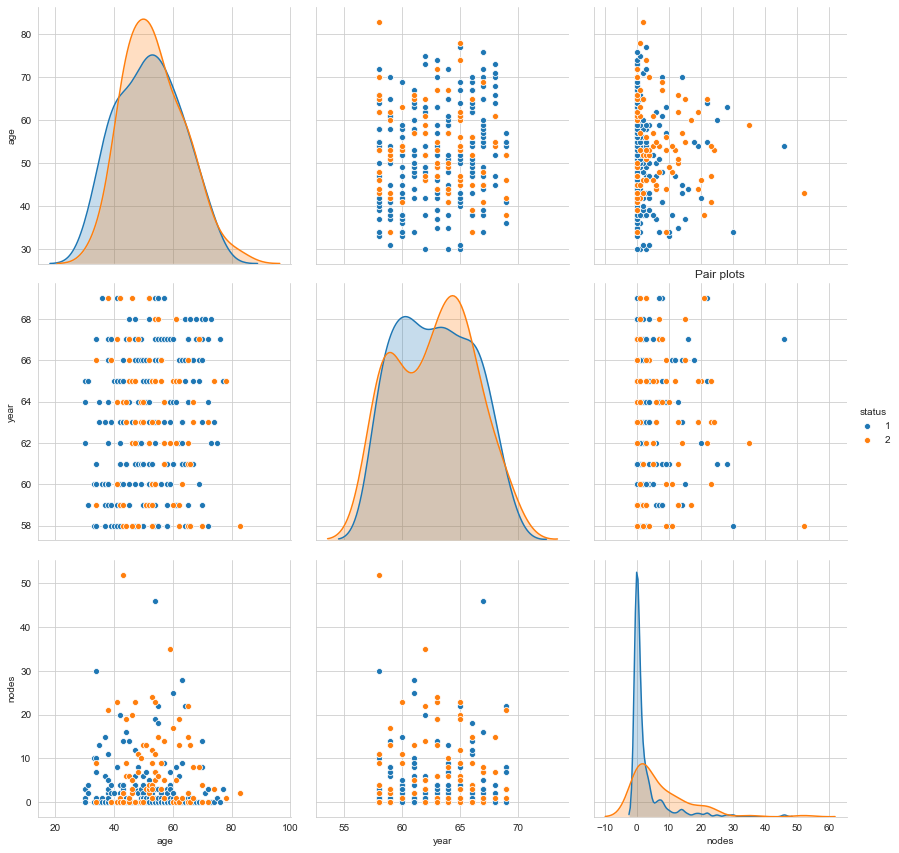

In [0]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(haberman, x_vars=['age','year','nodes'], y_vars=['age','year','nodes'], hue="status", size=4);
plt.title("Pair plots")
plt.show()

# Observation:
1) If you consider pair plot of year and age, we will just get the idea of the person age in a perticular year. It is differentiated by orange and blue according to survival of a person. We can also say the survival rate is more when the person is less than 40 years. We don't see any patients more than 80 years survived.

2) If we consider pair plot of year and nodes, blue dots are overlaped by blue. So we don't get clear picture of what is happening.

3) Now considering pair plot age and nodes, like I mentioned above we can see many blue points less than 10. That means people has a better chance of survival when active axilory nodes less than 10.

# Histogram, PDF, CDF

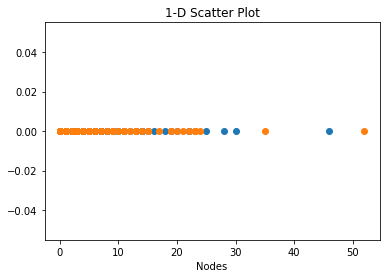

In [0]:
import numpy as np
haberman_1 = haberman.loc[haberman["status"] == 1];
haberman_2 = haberman.loc[haberman["status"] == 2];

plt.plot(haberman_1["nodes"], np.zeros_like(haberman_1['nodes']), 'o')
plt.plot(haberman_2["nodes"], np.zeros_like(haberman_2['nodes']), 'o')
plt.title("1-D Scatter Plot")
plt.xlabel("Nodes")
plt.show()

# Observation:
1) Since blue dots are overlapped by orange, we cannot jump into any conclusion.

2) We can see much orange points even though we have more blue points.

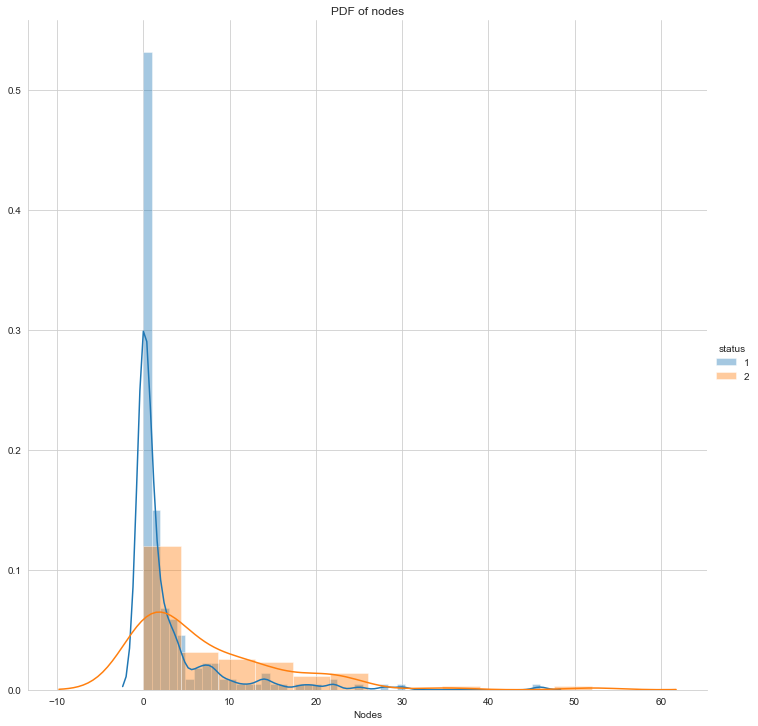

In [0]:
g=sns.FacetGrid(haberman, hue="status", height=10) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.title("PDF of nodes")
plt.xlabel("Nodes")
plt.show();



# Observation:
1) Above we ran into conclusion that patients have a better chance of survival if the number of nodes is less than 10. But here we can be more precise that patients have a greater chance of survival if the number of nodes is less than 2.

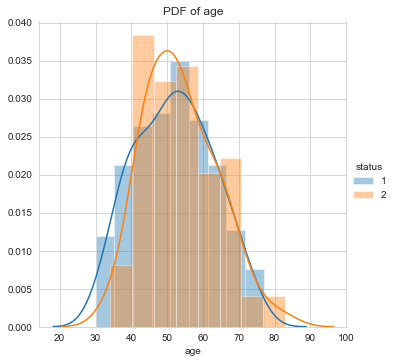

In [0]:
sns.FacetGrid(haberman, hue="status", height=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.title("PDF of age")
plt.xlabel("age")
plt.show();

# Observation:
1) According to the above plot, the patient who went to surgery at the age of 30 to 40 has a better chance of surviving more than 5 years.

2) We can see more people at the age between 40 to 60 have died within 5 years of operation than survived for more than 5 years.

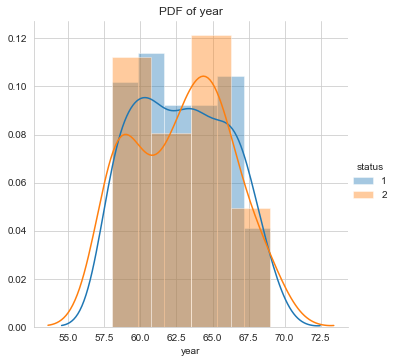

In [0]:
sns.FacetGrid(haberman, hue="status", height=5) \
   .map(sns.distplot, "year") \
   .add_legend();
plt.title("PDF of year")
plt.xlabel("year")
plt.show();

# Observation:
1) More people have died within 5 years of operation in the year between 58-60 and 63-66. Other than this we cannot jump to any conclusion from this PDF

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


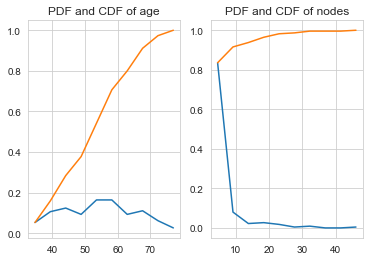

In [0]:
counts, bin_edges = np.histogram(haberman_1['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);

#Computing CDF

cdf = np.cumsum(pdf)
plt.figure(1)
plt.subplot(1,2,1)
plt.title("PDF and CDF of age")
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)

#nodes
counts, bin_edges = np.histogram(haberman_1['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);

#Computing CDF

cdf = np.cumsum(pdf)
plt.subplot(1,2,2)
plt.title("PDF and CDF of nodes")
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)

plt.show();


# observation:
1) As we can see age is not affecting anything, because the CDF curve is almost leaner when patients live longer than 5 years. That means almost the same number of patients are available in all the age groups.

2) But when it comes to nodes PDF and CDF we can witness CDF curve(red) starting from approximately 0.85 this tells us that people who lived more than 5 years, 85 percentile of people had less than 5 positive axillary nodes.

[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


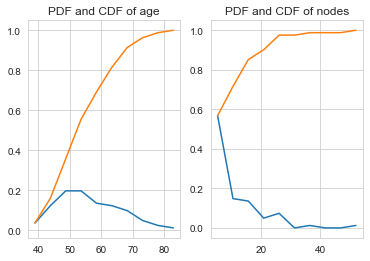

In [0]:
counts, bin_edges = np.histogram(haberman_2['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);

#Computing CDF

cdf = np.cumsum(pdf)
plt.figure(1)
plt.subplot(1,2,1)
plt.title("PDF and CDF of age")
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)

#nodes
counts, bin_edges = np.histogram(haberman_2['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);

#Computing CDF

cdf = np.cumsum(pdf)
plt.subplot(1,2,2)
plt.title("PDF and CDF of nodes")
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)


plt.show();

# observation:
1)Here we can see from nodes plot, only less than 60 percentile of people have less than 5 positive axillary nodes and the curve drastically increasing.

# Mean, Variance and Std-dev

In [0]:
#Mean, Variance, Std-deviation,  
print("people who lived more tham 5 years: \n")
print("Mean age: ",np.mean(haberman_1["age"]))
print("Std div of age:",np.std(haberman_1["age"]))
print("\nMean nodes",np.mean(haberman_1["nodes"]))
print("Std div of nodes",np.std(haberman_1["nodes"]))



print("\n\n\npeople who died less than 5 years: ");
print("\nMean age: ",np.mean(haberman_2["age"]))
print("Std div age: ",np.std(haberman_2["age"]))
print("\nMean nodes",np.mean(haberman_2["nodes"]))
print("Std div of nodes",np.std(haberman_2["nodes"]))

people who lived more tham 5 years: 

Mean age:  52.01777777777778
Std div of age: 10.98765547510051

Mean nodes 2.7911111111111113
Std div of nodes 5.857258449412131



people who died less than 5 years: 

Mean age:  53.67901234567901
Std div age:  10.10418219303131

Mean nodes 7.45679012345679
Std div of nodes 9.128776076761632


# Observation:
1. From this we can say, the mean age is not so different. 

2. But when it comes to the number of positive axillary nodes it's a big difference. So more the positive axillary nodes more possibility they won't be alive after 5 years.

# Median, Percentile, Quantile, IQR, MAD

In [0]:
#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print("Median age __1: ",np.median(haberman_1["age"]))
print("Median age __2: ",np.median(haberman_2["age"]))
print("Median nodes __1: ",np.median(haberman_1["nodes"]))
print("Median nodes __2: ",np.median(haberman_2["nodes"]))

print("\nQuantiles:")
print("Percentile__1 age: ",np.percentile(haberman_1["age"],np.arange(0, 100, 25)))
print("Percentile__2 age: ",np.percentile(haberman_2["age"],np.arange(0, 100, 25)))
print("Percentile__1 nodes: ",np.percentile(haberman_1["nodes"],np.arange(0, 100, 25)))
print("Percentile__2 nodes: ",np.percentile(haberman_2["nodes"],np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print("90th Percentile__1 age:",np.percentile(haberman_1["age"],90))
print("90th Percentile__2 age:",np.percentile(haberman_2["age"],90))
print("90th Percentile__1 nodes:",np.percentile(haberman_1["nodes"],90))
print("90th Percentile__2 nodes:",np.percentile(haberman_2["nodes"],90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print("MAD__1",robust.mad(haberman_1["age"]))
print("MAD__2",robust.mad(haberman_2["age"]))



Medians:
Median age __1:  52.0
Median age __2:  53.0
Median nodes __1:  0.0
Median nodes __2:  4.0

Quantiles:
Percentile__1 age:  [30. 43. 52. 60.]
Percentile__2 age:  [34. 46. 53. 61.]
Percentile__1 nodes:  [0. 0. 0. 3.]
Percentile__2 nodes:  [ 0.  1.  4. 11.]

90th Percentiles:
90th Percentile__1 age: 67.0
90th Percentile__2 age: 67.0
90th Percentile__1 nodes: 8.0
90th Percentile__2 nodes: 20.0

Median Absolute Deviation
MAD__1 13.343419966550417
MAD__2 11.860817748044816


# observation:
1) Here we will get a clear picture of percentile. 50 percentile of the people who lived more than 5 years had 0 positive axillary nodes. And have 8 positive axillary nodes when it comes to 90 percentile.

2) People who died less than 5 years of operation had 11 positive axillary nodes of 75 percentile people. But when it comes to 90 percentile 20 positive axillary nodes can be seen.

# Box plot and Whiskers

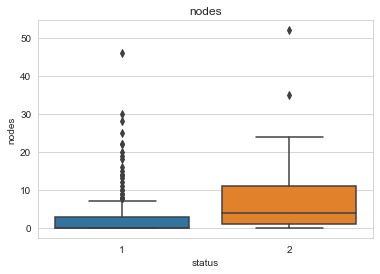

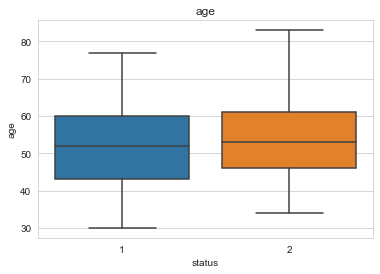

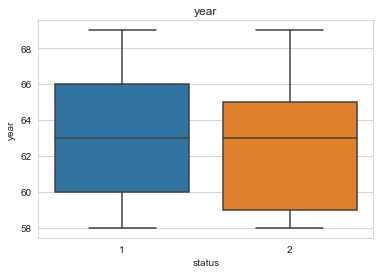

In [0]:
plt.figure(1)

#plt.subplot(1,3,1)
plt.title('nodes')
sns.boxplot(x='status',y='nodes', data=haberman)

#plt.subplot(1,3,2)
plt.figure(2)
plt.title("age")
sns.boxplot(x='status',y='age', data=haberman)
plt.figure(3)
#plt.subplot(1,3,3)
plt.title("year")
sns.boxplot(x='status',y='year', data=haberman)

plt.show()

# Observation:
1) As mentioned above we don't see much difference in age.

2) when it comes to nodes, we can see the percentile values graphically that 75 percentile of the people who died less than 5 years had 11 positive axillary nodes.

3) We can also see that people who survived more than 5 years, 50 percentile of the people had 0 positive nodes and also 75 percentile is less than 5 nodes.

4) But people with 0 nodes also died within 5 years. So the absence of positive axillary nodes cannot guarantee the survival of a patient.

# Violin plots

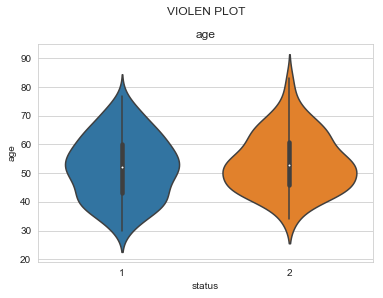

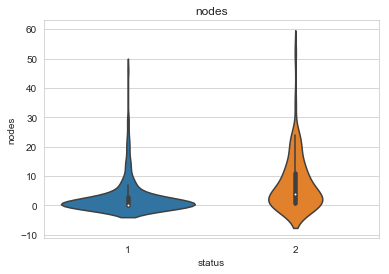

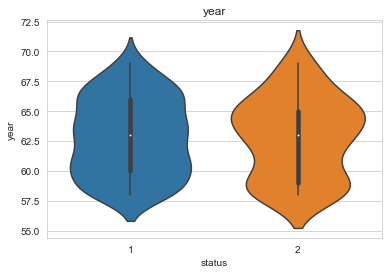

In [0]:
plt.figure(1)
plt.title("VIOLEN PLOT\n\nage")
sns.violinplot(x="status", y="age", data=haberman, size=8)

plt.figure(2)
plt.title("nodes")
sns.violinplot(x="status", y="nodes", data=haberman, size=8)

plt.figure(3)
plt.title("year")
sns.violinplot(x="status", y="year", data=haberman, size=8)

plt.show()

# observation:
1) In the violin plot of age, we will get some clarity about the age here. Status 2 has many numbers of patients in the age around 50 to 60 i.e. many patients have died in that range.

2) In the violin plot nodes, we will get into the same conclusion that less the number of positive axillary nodes better chance of surviving more than 5 years.

3) In the violin plot of year, we can see status 2 has many points in the year between 58-60 and 63-66 that means patients will not survive more than 5 years.

#  Multivariate probability density, contour plot.


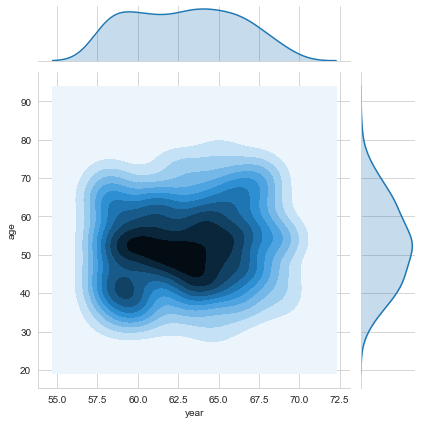

In [0]:
sns.jointplot(x="year", y="age", data=haberman, kind="kde", height = 6);

plt.show();


# Observation:
1. Many patients who went into surgery are of the age group between 45 to 55 and operation is done in the year 59-64.

# CONCLUSION:

1. Survival rate is good between the age 30 to 40.

2. Less the positive axillary nodes, better the chance of survival. But we have seen patients with 0 axillary nodes have died within 5 years. 

3. Number of patients in the age group of 40-65 is more.

4. Since this is an imbalanced data set, many cases can be misled by the majority.

5. Age and nodes play an important role in the analysis of patients survival status but the year does not influence on patients survival status.